## Pandas Data Science Tasks

#### import all files

In [ ]:
import os
import pandas as pd

path = "./Sales_Data"
file_names = os.listdir(path)
file_names

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv',
 'all_combined_raw.csv']

#### combine all files and store again

In [10]:
df = pd.DataFrame()
for file_name in file_names:
    file_path = path + '/' + file_name
    file = pd.read_csv(file_path)
    df = pd.concat([df, file])
df.dropna(inplace=True)
df.to_csv(path + '/' + 'all_combined_raw.csv', index=False)
df.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
27513,245477,27in FHD Monitor,1,149.99,08/14/19 21:48,"678 14th St, New York City, NY 10001"
13698,272431,27in FHD Monitor,1,149.99,10/07/19 10:54,"975 Johnson St, Dallas, TX 75001"
6434,229063,Google Phone,1,600,07/19/19 20:21,"19 Maple St, New York City, NY 10001"
6110,228752,Bose SoundSport Headphones,1,99.99,07/24/19 12:16,"903 6th St, Seattle, WA 98101"
39553,304513,Wired Headphones,1,11.99,12/03/19 19:13,"631 Wilson St, San Francisco, CA 94016"


#### cleaning datatime

In [ ]:
import pandas as pd 

df = pd.read_csv("./Sales_Data/all_combined_raw.csv")

# print(df.loc[517, "Order Date"])
# At location 517 value is "order date", errors='coerce' will add NaT which is like NaN at its place
df["Order Date"] = pd.to_datetime(df["Order Date"], errors='coerce')
df.dropna(subset="Order Date", inplace=True)
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"
5,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016"
6,176563,Bose SoundSport Headphones,1,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101"
7,176564,USB-C Charging Cable,1,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301"
8,176565,Macbook Pro Laptop,1,1700,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016"
9,176566,Wired Headphones,1,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215"


#### correct the column types

In [12]:
df["Order ID"] = pd.to_numeric(df["Order ID"])
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"])
df["Price Each"] = pd.to_numeric(df["Price Each"])
df["Product"] = df["Product"].str.strip()
df["Purchase Address"] = df["Purchase Address"].str.strip()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371900 entries, 0 to 372609
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          371900 non-null  int64         
 1   Product           371900 non-null  object        
 2   Quantity Ordered  371900 non-null  int64         
 3   Price Each        371900 non-null  float64       
 4   Order Date        371900 non-null  datetime64[ns]
 5   Purchase Address  371900 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 19.9+ MB


#### augment data with additional columns

In [ ]:
df["Month"] = df["Order Date"].dt.month
df["Hours"] = df["Order Date"].dt.hour
df["Price"] = df["Price Each"] * df["Quantity Ordered"]

def get_city_n_state(addr):
    addr = addr.lower().split(', ')
    city = addr[1].strip()
    state = addr[2].split(' ')[0].strip()
    return city + ' ' + state
df["City"] = df["Purchase Address"].apply(lambda x: get_city_n_state(x))

path = "./Sales_Data"
df.to_csv(path + '/' + 'all_combined_processed.csv', index=False)

df.head(10)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hours,Price,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,8,23.90,dallas tx
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,22,99.99,boston ma
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,600.00,los angeles ca
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,11.99,los angeles ca
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,9,11.99,los angeles ca
5,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",4,13,11.95,san francisco ca
6,176563,Bose SoundSport Headphones,1,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",4,7,99.99,seattle wa
7,176564,USB-C Charging Cable,1,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",4,10,11.95,atlanta ga
8,176565,Macbook Pro Laptop,1,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",4,10,1700.00,san francisco ca
9,176566,Wired Headphones,1,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",4,14,11.99,boston ma


### Data Exploration

In [1]:
import pandas as pd 

path = "./Sales_Data"
df = pd.read_csv(path + '/' + 'all_combined_processed.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hours,Price,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,8,23.90,dallas tx
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,22,99.99,boston ma
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,600.00,los angeles ca
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,11.99,los angeles ca
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,9,11.99,los angeles ca


#### Question 1: What was the best month for sales? How much was earned that month?

<function matplotlib.pyplot.show(close=None, block=None)>

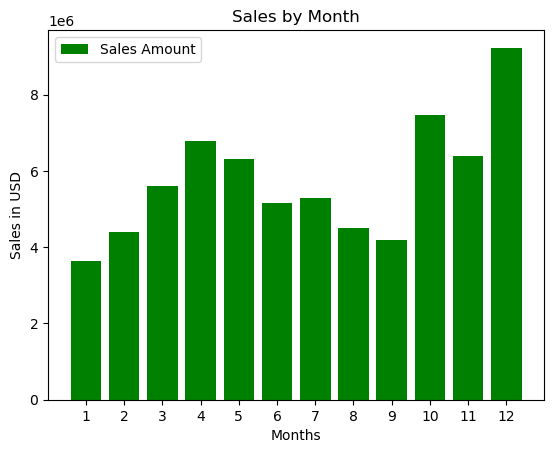

In [2]:
import matplotlib.pyplot as plt 

months = df.groupby("Month").sum(numeric_only=True)

plt.bar(months.index, months["Price"], label="Sales Amount", color="green")
plt.xticks(months.index)
plt.title("Sales by Month")
plt.xlabel("Months")
plt.ylabel("Sales in USD")
plt.legend(loc="upper left")
plt.show

#### Question 2: What city sold the most product?

<function matplotlib.pyplot.show(close=None, block=None)>

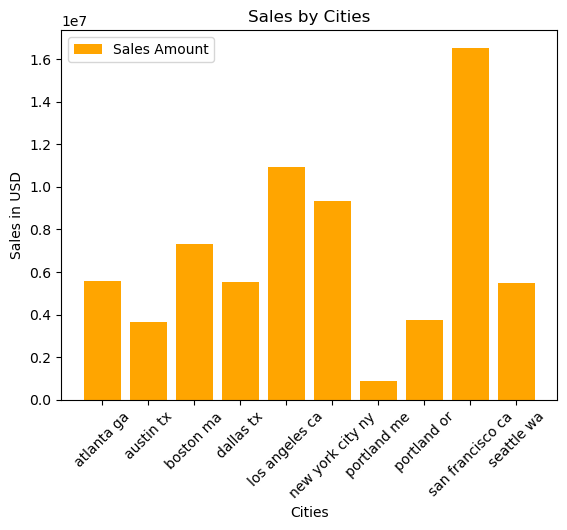

In [3]:
cities = df.groupby("City").sum(numeric_only=True)

plt.bar(cities.index, cities["Price"], label="Sales Amount", color="orange")
plt.xticks(ticks=cities.index, rotation=45)
plt.title("Sales by Cities")
plt.xlabel("Cities")
plt.ylabel("Sales in USD")
plt.legend(loc="upper left")
plt.show

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

<function matplotlib.pyplot.show(close=None, block=None)>

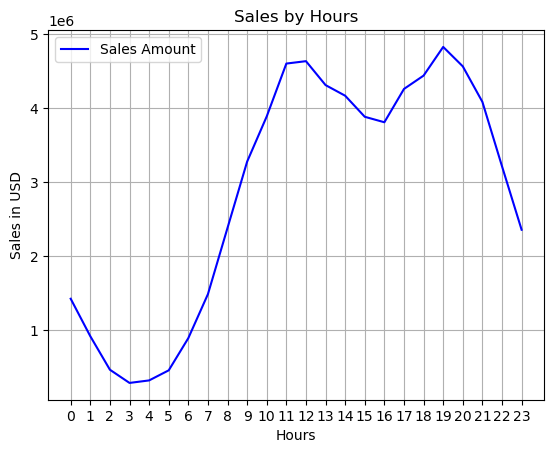

In [4]:
hours = df.groupby("Hours").sum(numeric_only=True)

plt.plot(hours.index, hours["Price"], label="Sales Amount", color="blue")
plt.xticks(ticks=hours.index, rotation=0)
plt.title("Sales by Hours")
plt.xlabel("Hours")
plt.ylabel("Sales in USD")
plt.legend(loc="upper left")
plt.grid()
plt.show

#### Question 4: What product sold the most? Why do you think it sold the most?

<function matplotlib.pyplot.show(close=None, block=None)>

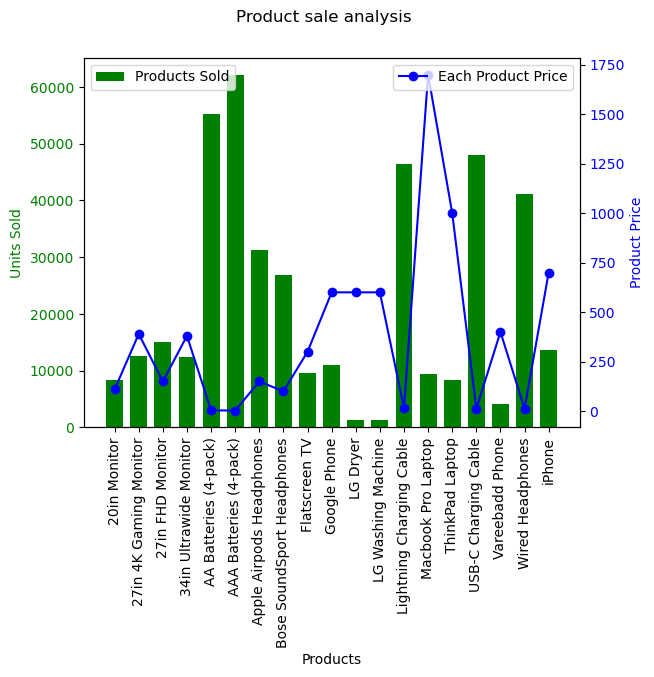

In [5]:
# value_counts : count the number of occurrences of each unique value in a Series
# print(df["Product"].value_counts())

products = df.groupby("Product")["Quantity Ordered"].sum()
prices = df.groupby("Product")["Price Each"].mean()

fig, ax1 = plt.subplots()
fig.suptitle("Product sale analysis")

ax1.bar(products.index, products.values, width=0.7, color='green', label="Products Sold")
ax1.set_xlabel("Products")
ax1.tick_params(axis='x', rotation=90)
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_ylabel("Units Sold", color='green')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(prices.index, prices.values, color='blue', marker='o', label="Each Product Price")
ax2.set_ylabel("Product Price", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.legend(loc='upper right')

plt.show